In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('train (1).csv')

In [4]:
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
data = data.drop(['id'],axis = 1)

# Feature Engineering 

In [6]:
# Define bins and labels for categorizing age groups
age_bins = [0, 12, 19, 35, 60, 100]  # Age range from 0 to 100
age_labels = ['Child', 'Teen', 'Young Adult', 'Middle-Aged Adult', 'Senior']
 

data['Age'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

In [7]:
data['Age']

0        Young Adult
1               Teen
2               Teen
3        Young Adult
4        Young Adult
            ...     
20753    Young Adult
20754           Teen
20755    Young Adult
20756    Young Adult
20757    Young Adult
Name: Age, Length: 20758, dtype: category
Categories (5, object): ['Child' < 'Teen' < 'Young Adult' < 'Middle-Aged Adult' < 'Senior']

In [8]:
data.dtypes

Gender                              object
Age                               category
Height                             float64
Weight                             float64
family_history_with_overweight      object
FAVC                                object
FCVC                               float64
NCP                                float64
CAEC                                object
SMOKE                               object
CH2O                               float64
SCC                                 object
FAF                                float64
TUE                                float64
CALC                                object
MTRANS                              object
NObeyesdad                          object
dtype: object

In [9]:
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

In [10]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Male,Young Adult,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,Female,Teen,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,Female,Teen,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,Female,Young Adult,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,Male,Young Adult,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151


# Robust Scaler 

In [11]:
from sklearn.preprocessing import RobustScaler


 
numerical_features=['Height','Weight','FCVC','NCP','CH2O','FAF','TUE','BMI']
# Initialize the RobustScaler
scaler = RobustScaler()

data1 = data[numerical_features].apply(pd.to_numeric, errors='coerce')



# Encode categorical to Numerical

In [12]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb

LabelEncoder()

In [13]:
data1['Gender'] = lb.fit_transform(data['Gender'])
data1['Age'] = lb.fit_transform(data['Age'])
data1['family_history_with_overweight'] = lb.fit_transform(data['family_history_with_overweight'])
data1['FAVC'] = lb.fit_transform(data['FAVC'])
data1['CAEC'] = lb.fit_transform(data['CAEC'])
data1['SMOKE'] = lb.fit_transform(data['SMOKE'])
data1['SCC'] = lb.fit_transform(data['SCC'])
data1['CALC'] = lb.fit_transform(data['CALC'])
data1['MTRANS'] = lb.fit_transform(data['MTRANS'])
data1['NObeyesdad'] = lb.fit_transform(data['NObeyesdad'])

In [14]:
data1.head()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender,Age,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,28.259565,1,3,1,1,2,0,0,1,3,6
1,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,23.422091,0,2,1,1,1,0,0,2,0,1
2,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,17.126706,0,2,1,1,2,0,0,2,3,0
3,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,44.855798,0,3,1,1,2,0,0,1,3,4
4,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,25.599151,1,3,1,1,2,0,0,1,3,6


In [15]:
data1.head()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender,Age,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,28.259565,1,3,1,1,2,0,0,1,3,6
1,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,23.422091,0,2,1,1,1,0,0,2,0,1
2,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,17.126706,0,2,1,1,2,0,0,2,3,0
3,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,44.855798,0,3,1,1,2,0,0,1,3,4
4,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,25.599151,1,3,1,1,2,0,0,1,3,6


# Model Creation 

In [16]:
# Features and target
X = data1.drop(['NObeyesdad'], axis=1)  # Assuming BMI is not a feature for classification
y = data1['NObeyesdad']


In [17]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
X_train.head()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender,Age,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
9958,1.770000,97.000000,3.0,3.000000,2.000000,3.000000,1.0,30.961729,1,2,1,1,0,0,0,2,0
7841,1.753389,54.877111,2.0,4.000000,2.000000,2.000000,1.0,17.849855,1,3,1,1,2,0,0,2,3
9293,1.819867,122.024954,3.0,2.880817,1.645338,0.739881,0.0,36.844219,1,3,1,1,2,0,0,1,3
15209,1.580000,80.000000,2.0,3.000000,1.000000,0.000000,0.0,32.046146,0,0,1,1,2,0,0,1,0
16515,1.800000,95.000000,3.0,3.000000,3.000000,2.000000,1.0,29.320988,1,3,1,0,2,0,0,0,3


# Random Forest 

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [19]:
y_pred = rf_classifier.predict(X_train)
y_pred

array([2, 0, 3, ..., 5, 4, 2])

In [20]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (16606, 17)
y_train shape: (16606,)


In [21]:
 #Evaluation Metrics for Classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_train, y_pred)
conf_matrix = confusion_matrix(y_train, y_pred)
class_report = classification_report(y_train, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9993978080211972
Confusion Matrix:
 [[1998    1    0    0    0    0    0]
 [   1 2453    0    0    0    2    0]
 [   0    0 2366    0    0    0    1]
 [   0    0    0 2591    0    0    0]
 [   0    0    0    0 3242    0    0]
 [   0    1    0    0    0 1940    2]
 [   0    0    1    0    0    1 2006]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       1.00      1.00      1.00      2456
           2       1.00      1.00      1.00      2367
           3       1.00      1.00      1.00      2591
           4       1.00      1.00      1.00      3242
           5       1.00      1.00      1.00      1943
           6       1.00      1.00      1.00      2008

    accuracy                           1.00     16606
   macro avg       1.00      1.00      1.00     16606
weighted avg       1.00      1.00      1.00     16606



In [22]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)


y_test shape: (4152,)
y_pred shape: (16606,)


In [23]:
y_pred = rf_classifier.predict(X_test)
y_pred

array([4, 5, 2, ..., 2, 5, 6])

In [24]:
#Evaluation Metrics for Classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8990847784200385
Confusion Matrix:
 [[488  33   0   0   0   2   1]
 [ 24 556   0   0   0  43   3]
 [  2   1 476  13   1  16  34]
 [  0   0  23 631   2   0   1]
 [  0   0   1   1 802   0   0]
 [  1  41   8   0   0 369  65]
 [  0   9  41   2   0  51 411]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       524
           1       0.87      0.89      0.88       626
           2       0.87      0.88      0.87       543
           3       0.98      0.96      0.97       657
           4       1.00      1.00      1.00       804
           5       0.77      0.76      0.76       484
           6       0.80      0.80      0.80       514

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



# XGBOOST 

Before applying feature importance 

In [84]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier with default parameters
xgb = XGBClassifier(random_state=42)

# Fit the model to the training data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [85]:
y_pred = xgb.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print(accuracy_score(y_train,y_pred))

0.984945200529929


In [86]:
y_pred = xgb.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test,y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


0.9019749518304432
Confusion Matrix:
[[489  30   0   0   0   3   2]
 [ 24 554   0   0   1  41   6]
 [  2   1 474  10   1  16  39]
 [  0   0  19 632   3   0   3]
 [  0   0   0   1 802   0   1]
 [  1  34  11   0   0 384  54]
 [  0   8  35   5   0  56 410]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       524
           1       0.88      0.88      0.88       626
           2       0.88      0.87      0.88       543
           3       0.98      0.96      0.97       657
           4       0.99      1.00      1.00       804
           5       0.77      0.79      0.78       484
           6       0.80      0.80      0.80       514

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



After applying feature importance

                           Feature  Importance
8                           Gender    0.358933
7                              BMI    0.277071
1                           Weight    0.109099
11                            FAVC    0.035262
4                             CH2O    0.024133
15                            CALC    0.023521
2                             FCVC    0.023417
14                             SCC    0.019982
3                              NCP    0.017849
10  family_history_with_overweight    0.017795
9                              Age    0.016231
12                            CAEC    0.015783
6                              TUE    0.014040
0                           Height    0.013211
5                              FAF    0.012967
16                          MTRANS    0.012471
13                           SMOKE    0.008235


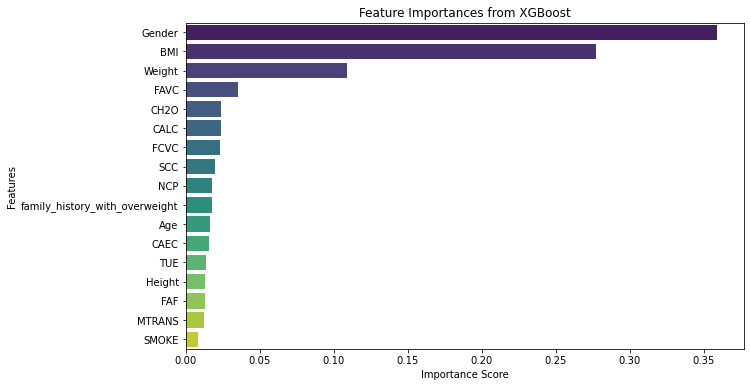

In [87]:
# Get feature importances
importances = xgb.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances from XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

Top Features:

Gender (0.358933): The most important feature in your model, likely indicating a strong relationship between gender and the target variable.

BMI (0.277071): BMI (Body Mass Index) is the second most significant predictor, which makes sense as it's often closely related to health conditions, including obesity.

Weight (0.109099): Another important feature related to the individual's body composition, which has a high influence on obesity.

Mid-Level Features:

FAVC (0.035262): Frequent consumption of high-calorie food could be moderately important in predicting obesity risk.

CH2O (0.024133): Daily water intake, though less important, still has some predictive power in the model.

CALC (0.023521): Calcium intake or alcohol consumption is contributing slightly.

FCVC (0.023417): Frequency of vegetable consumption helps in a small way to predict obesity.

Low Importance Features:

SCC (0.019982): This feature (likely related to sugar consumption) plays a lesser role.

NCP (0.017849): Number of main meals is less predictive but still contributes.

Family history of overweight (0.017795): Family history has some role in predicting the target variable.

Age (0.016231): Surprisingly, age is not as significant in your model.

Other features (TUE, Height, FAF, MTRANS, SMOKE): These have very low importance, but they may still add value in specific cases or when combined with other features.

In [88]:
# Set a threshold for feature importance
importance_threshold = 0.010# Adjust as needed

# Select features above the threshold
significant_features = feature_importances[feature_importances['Importance'] > importance_threshold]['Feature'].tolist()
print("Significant Features:", significant_features)

# Final dataset with significant features
X_significant = X_train[significant_features]


Significant Features: ['Gender', 'BMI', 'Weight', 'FAVC', 'CH2O', 'CALC', 'FCVC', 'SCC', 'NCP', 'family_history_with_overweight', 'Age', 'CAEC', 'TUE', 'Height', 'FAF', 'MTRANS']


In [89]:
from xgboost import XGBClassifier

# Initialize the model
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_clf.fit(X_significant, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [90]:
# Select significant features in training and testing sets
X_train_significant = X_train[significant_features]
X_test_significant = X_test[significant_features]

In [91]:
# Predictions
y_train_pred =xgb_clf.predict(X_train_significant)
y_test_pred =xgb_clf.predict(X_test_significant)

In [92]:
# Training Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")
    
    # Testing Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy}")
    
    # Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
    
    # Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.9846441045405275
Testing Accuracy: 0.9022157996146436

Confusion Matrix:
[[489  32   0   0   0   2   1]
 [ 26 553   0   0   1  40   6]
 [  2   1 470  11   1  15  43]
 [  0   0  18 634   3   0   2]
 [  0   0   0   1 802   0   1]
 [  1  36   9   0   0 380  58]
 [  0   9  37   3   0  47 418]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       524
           1       0.88      0.88      0.88       626
           2       0.88      0.87      0.87       543
           3       0.98      0.96      0.97       657
           4       0.99      1.00      1.00       804
           5       0.79      0.79      0.79       484
           6       0.79      0.81      0.80       514

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



# Hyperparameter XGB

Manually set parameters 

In [18]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=10,              # Reduced from 20 to prevent overfitting
    min_child_weight=1,        # Equivalent to min_samples_split/min_samples_leaf
    gamma=0,                   # Adjust as needed
    subsample=0.8,             # 80% of samples
    colsample_bytree=0.8,      # 80% of features
    learning_rate=0.1,         # Commonly used learning rate
    use_label_encoder=False,   # To avoid warnings in newer versions
    eval_metric='logloss'      # Specify evaluation metric
)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [21]:
y_train_pred = xgb.predict(X_train)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Training Accuracy: {training_accuracy * 100:.2f}%")

Training Accuracy: 98.77%


In [59]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.9014932562620424
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.94      0.94       524
           1       0.88      0.89      0.88       626
           2       0.87      0.87      0.87       543
           3       0.98      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.78      0.77      0.78       484
           6       0.79      0.80      0.80       514

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152

Confusion Matrix: [[490  31   0   0   0   2   1]
 [ 27 555   0   0   0  39   5]
 [  2   1 474  11   1  14  40]
 [  0   0  19 635   2   0   1]
 [  0   0   0   1 802   0   1]
 [  1  38  10   0   0 375  60]
 [  0   8  43   2   0  49 412]]


In [22]:
from sklearn.model_selection import RandomizedSearchCV
# Define the XGBoost classifier
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': np.arange(5, 15, 2),
    'learning_rate': np.linspace(0.01, 0.2, 5),
    'subsample': np.linspace(0.7, 1.0, 3),
    'colsample_bytree': np.linspace(0.7, 1.0, 3),
    'min_child_weight': np.arange(1, 6),
    'gamma': np.linspace(0, 0.3, 5)
}

# Set up RandomizedSearchCV with a limited number of iterations (n_iter=10)
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', verbose=1)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters found by RandomizedSearchCV:", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters found by RandomizedSearchCV: {'subsample': 0.85, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.105, 'gamma': 0.3, 'colsample_bytree': 0.7}


In [33]:
# Use the best estimator for predictions
best_xgb = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_xgb.predict(X_test)


# Evaluate the model's performance
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('accuracy_score:')
print(accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
    
    # Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy_score:
0.9048651252408478

Confusion Matrix:
[[489  32   0   0   0   2   1]
 [ 22 559   0   0   0  36   9]
 [  2   1 476  10   1  12  41]
 [  0   0  20 633   3   0   1]
 [  0   0   1   1 802   0   0]
 [  1  35  10   0   0 382  56]
 [  0   6  38   2   0  52 416]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       524
           1       0.88      0.89      0.89       626
           2       0.87      0.88      0.88       543
           3       0.98      0.96      0.97       657
           4       1.00      1.00      1.00       804
           5       0.79      0.79      0.79       484
           6       0.79      0.81      0.80       514

    accuracy                           0.90      4152
   macro avg       0.90      0.89      0.89      4152
weighted avg       0.91      0.90      0.91      4152



In [34]:
y_train_pred = best_xgb.predict(X_train)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('accuracy_score:')
print(accuracy_score(y_train, y_train_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
    
    # Classification Report
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))

accuracy_score:
0.9677225099361676

Confusion Matrix:
[[1952   42    1    1    0    3    0]
 [  44 2363    3    0    0   39    7]
 [   1    2 2288   20    4   17   35]
 [   0    0   12 2576    0    0    3]
 [   1    0    1    1 3236    3    0]
 [   7   80   14    0    0 1761   81]
 [   0    9   44    3    0   58 1894]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1999
           1       0.95      0.96      0.95      2456
           2       0.97      0.97      0.97      2367
           3       0.99      0.99      0.99      2591
           4       1.00      1.00      1.00      3242
           5       0.94      0.91      0.92      1943
           6       0.94      0.94      0.94      2008

    accuracy                           0.97     16606
   macro avg       0.96      0.96      0.96     16606
weighted avg       0.97      0.97      0.97     16606



# SVM

Scaling: It's essential to scale your data before using SVM since it is sensitive to feature scaling.

In [60]:
from sklearn.svm import SVC

# Initialize the SVC classifier with default parameters
svm = SVC()

# Fit the model to the training data
svm.fit(X_train, y_train)



SVC()

In [61]:
y_pred = svm.predict(X_train)
y_pred

array([2, 0, 3, ..., 5, 4, 3])

In [62]:
print('Accuracy:', accuracy_score(y_train, y_pred))
print('Classification Report:', classification_report(y_train, y_pred))
print('Confusion Matrix:', confusion_matrix(y_train, y_pred))

Accuracy: 0.8181380224015417
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.95      0.89      1999
           1       0.86      0.72      0.78      2456
           2       0.77      0.80      0.78      2367
           3       0.91      0.85      0.88      2591
           4       0.95      0.96      0.95      3242
           5       0.67      0.64      0.65      1943
           6       0.65      0.72      0.69      2008

    accuracy                           0.82     16606
   macro avg       0.81      0.81      0.80     16606
weighted avg       0.82      0.82      0.82     16606

Confusion Matrix: [[1901   90    0    1    0    5    2]
 [ 359 1767    3    0    0  296   31]
 [   1    3 1896  148   53   28  238]
 [   0    0  250 2210  117    2   12]
 [   1    0   47   73 3118    3    0]
 [  15  170   32    0    0 1244  482]
 [   0   29  246    1    0  282 1450]]


In [64]:
# Make predictions on the test data
y_pred = svm.predict(X_test)
y_pred

array([4, 5, 6, ..., 2, 6, 6])

In [65]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.8126204238921002
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.95      0.89       524
           1       0.85      0.72      0.78       626
           2       0.75      0.76      0.76       543
           3       0.91      0.84      0.87       657
           4       0.94      0.96      0.95       804
           5       0.66      0.63      0.65       484
           6       0.65      0.75      0.70       514

    accuracy                           0.81      4152
   macro avg       0.80      0.80      0.80      4152
weighted avg       0.82      0.81      0.81      4152

Confusion Matrix: [[496  25   0   0   0   2   1]
 [ 89 451   0   0   0  80   6]
 [  2   0 415  33  12   9  72]
 [  0   0  66 550  40   0   1]
 [  0   0  10  22 771   0   1]
 [  1  44   8   0   0 307 124]
 [  0   8  55   1   0  66 384]]


# Decision Tree 

In [66]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [67]:
y_pred = dt_classifier.predict(X_train)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Classification Report
report = classification_report(y_train, y_pred)
print(f"Classification Report:\n{report}")



Accuracy: 0.9994
Confusion Matrix:
[[1999    0    0    0    0    0    0]
 [   2 2454    0    0    0    0    0]
 [   0    0 2367    0    0    0    0]
 [   0    0    0 2591    0    0    0]
 [   0    0    0    0 3242    0    0]
 [   0    3    0    0    0 1939    1]
 [   0    0    2    0    0    2 2004]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       1.00      1.00      1.00      2456
           2       1.00      1.00      1.00      2367
           3       1.00      1.00      1.00      2591
           4       1.00      1.00      1.00      3242
           5       1.00      1.00      1.00      1943
           6       1.00      1.00      1.00      2008

    accuracy                           1.00     16606
   macro avg       1.00      1.00      1.00     16606
weighted avg       1.00      1.00      1.00     16606



In [68]:

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Classification Report
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")



Accuracy: 0.8389
Confusion Matrix:
[[456  60   0   0   1   7   0]
 [ 57 500   5   0   1  53  10]
 [  2   2 434  20   1  28  56]
 [  0   0  36 617   2   0   2]
 [  0   0   1   1 801   0   1]
 [  2  49  18   3   3 330  79]
 [  1  14  56   7   1  90 345]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       524
           1       0.80      0.80      0.80       626
           2       0.79      0.80      0.79       543
           3       0.95      0.94      0.95       657
           4       0.99      1.00      0.99       804
           5       0.65      0.68      0.67       484
           6       0.70      0.67      0.69       514

    accuracy                           0.84      4152
   macro avg       0.82      0.82      0.82      4152
weighted avg       0.84      0.84      0.84      4152



# Hyperparameter (Decision Tree)

In [69]:
# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 5, 10],  # Minimum samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider for the best split
    'splitter': ['best', 'random']  # Strategy used to split at each node
}

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Set up RandomizedSearchCV
dt_cv = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_grid, 
                           scoring='accuracy', n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
dt_cv.fit(X_train, y_train)

# Get the best parameters
best_params = dt_cv.best_params_
print(f"Best Parameters: {best_params}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy'}


In [70]:
best_dt = DecisionTreeClassifier(**best_params, random_state=42)
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=42)

In [71]:
# Make predictions on the test data
y_pred = best_dt.predict(X_train)

# Evaluate the accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Classification Report
report = classification_report(y_train, y_pred)
print(f"Classification Report:\n{report}")


Accuracy on the test set: 0.89
Confusion Matrix:
[[1876  114    1    1    0    7    0]
 [ 177 2131    5    0    0  125   18]
 [   1    4 2068   94   11   60  129]
 [   0    0  106 2460   12    1   12]
 [   1    0    4    8 3226    3    0]
 [  16  191   54    0    0 1473  209]
 [   0   36  208   10    0  235 1519]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1999
           1       0.86      0.87      0.86      2456
           2       0.85      0.87      0.86      2367
           3       0.96      0.95      0.95      2591
           4       0.99      1.00      0.99      3242
           5       0.77      0.76      0.77      1943
           6       0.80      0.76      0.78      2008

    accuracy                           0.89     16606
   macro avg       0.88      0.88      0.88     16606
weighted avg       0.89      0.89      0.89     16606



In [72]:
# Make predictions on the test data
y_pred = best_dt.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Classification Report
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")


Accuracy on the test set: 0.87
Confusion Matrix:
[[481  40   0   0   0   2   1]
 [ 42 520   0   0   0  60   4]
 [  2   1 467  13   2  25  33]
 [  0   0  37 616   4   0   0]
 [  0   0   1   3 800   0   0]
 [  2  57  14   0   0 348  63]
 [  0  11  50   4   0  84 365]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       524
           1       0.83      0.83      0.83       626
           2       0.82      0.86      0.84       543
           3       0.97      0.94      0.95       657
           4       0.99      1.00      0.99       804
           5       0.67      0.72      0.69       484
           6       0.78      0.71      0.74       514

    accuracy                           0.87      4152
   macro avg       0.85      0.85      0.85      4152
weighted avg       0.87      0.87      0.87      4152



# KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust n_neighbors based on your needs

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy on the test set: 0.8759633911368016
Confusion Matrix:
[[496  25   0   0   0   2   1]
 [ 48 515   1   0   0  55   7]
 [  2   2 458  18   6  14  43]
 [  0   0  29 620   6   0   2]
 [  0   0   1   6 797   0   0]
 [  1  44  15   0   0 356  68]
 [  0  13  56   4   0  46 395]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       524
           1       0.86      0.82      0.84       626
           2       0.82      0.84      0.83       543
           3       0.96      0.94      0.95       657
           4       0.99      0.99      0.99       804
           5       0.75      0.74      0.74       484
           6       0.77      0.77      0.77       514

    accuracy                           0.88      4152
   macro avg       0.86      0.86      0.86      4152
weighted avg       0.88      0.88      0.88      4152



In [77]:
y_pred = knn.predict(X_train)

# Evaluate the model
# Evaluate the accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy on the train set: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_pred))

Accuracy on the train set: 0.92
Confusion Matrix:
[[1917   74    1    1    0    5    1]
 [ 135 2221    2    0    0   85   13]
 [   1    8 2110   91   19   29  109]
 [   0    2   58 2504   19    0    8]
 [   1    0    6   11 3221    3    0]
 [  21  127   72    1    1 1556  165]
 [   3   50  149    6    0  112 1688]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1999
           1       0.89      0.90      0.90      2456
           2       0.88      0.89      0.89      2367
           3       0.96      0.97      0.96      2591
           4       0.99      0.99      0.99      3242
           5       0.87      0.80      0.83      1943
           6       0.85      0.84      0.85      2008

    accuracy                           0.92     16606
   macro avg       0.91      0.91      0.91     16606
weighted avg       0.92      0.92      0.92     16606



# GradientBoosting

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier with default parameters
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_train)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9158135613633627


In [81]:
y_pred = gb_classifier.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8976396917148363
